In [15]:
import os,random,itertools,matplotlib
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
# Umitools
from umi_tools._dedup_umi import edit_distance
matplotlib.rcParams['font.family'] = 'Helvetica'

def str2array(s):
    a,b= s.split('\t')[:2]
    return (a,int(b))

def merge_edit_1(counts):
    keep,collapse = [],counts[0:]
    while len(collapse)>0:
        ref = list(collapse[0]) # need to convert to list here otherwise will keep updating the value to new_cluster
        temp = []
        for s in collapse[1:]:
            s1 = ref[0]
            s2 = s[0]
            if abs(len(s1)-len(s2))<=1 and edit_distance(s1.encode('utf-8'),s2.encode('utf-8'))<2:
                ref[-1] += s[-1]
            else:
                temp.append(s)
        keep.append(ref)
        collapse = temp[0:]
    return np.array(keep,dtype=object)

def reverse_complement(seq):
    """This function returns the reverse_complement sequence of the input sequence
    from 3' to 5' """
    complement = {'A':'T', 'C':'G','G':'C', 'T':'A', 'N':'N','U':'A'}
    rcomp_seq = ''
    for base in seq:
        rcomp_seq = complement[base] + rcomp_seq   
    return rcomp_seq
%matplotlib inline


# ENGRAM dev 1.0 vs 2.0

## ENGRAM 1.0 U6 vs PGK supp Figure 1c

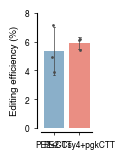

In [17]:
df = pd.DataFrame([['PE2+CTT','rep1', 4.91], ['PE2+CTT','rep2', 7.15], ['PE2+CTT','rep3', 3.91], ['PE2-Csy4+pgkCTT','rep1', 6.11], ['PE2-Csy4+pgkCTT','rep2', 5.39], ['PE2-Csy4+pgkCTT','rep3', 6.17]],columns=['Designs','rep','Editing efficiency'])
fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency',palette=['#80B1D3','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1) 
sns.stripplot(data=df, x="Designs", y='Editing efficiency', dodge=True,color="#4A4A4A",marker='.',size=4,ax=axs)
axs.set_ylim(0,8)
start, end = axs.get_ylim()
axs.yaxis.set_ticks(np.arange(start, end+1, 2))
axs.set_xlabel('');
g.set_box_aspect(4.5/len(g.patches))
start, end = axs.get_ylim()
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
#plt.savefig('../Figure1/SuppFig1c.pdf')

## ENGRAM 1.0 minP vs CRE-minP K562 Supp Fig 1d

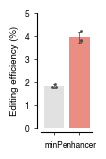

In [18]:
path = '../Figure1/CRE_vs_minP/'
samples =sorted([s.split('_S')[0] for s in os.listdir(path) if '.gz' in s and 'R1' in s])

edits = []
for s in samples:
    file = path+s
    #rcount = int(read_count[read_count['sample'].str.contains(s)]['counts'])
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = np.array([a for a in [str2array(s) for s in temp]if len(a[0])==5 or a[0]==''],dtype=object)
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    b = a.rstrip('_5N').lstrip('K562_')
    edits.append([b,'rep'+rep,ratio*100])
df = pd.DataFrame(edits,columns=['Designs','rep','Editing efficiency'])

fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency',order=['minP','enhancer'],palette=['#E1E1E1','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1) 
sns.stripplot(data=df, x="Designs", y='Editing efficiency',order=['minP','enhancer'],dodge=True,color="#4A4A4A",marker='.',size=4,ax=axs)
axs.set_xlabel('');
axs.set_ylim(0,5);
g.set_box_aspect(4.5/len(g.patches))
start, end = axs.get_ylim()
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
#plt.savefig('../Figure1/fig/SupFig1d.pdf')

## ENGRAM 1.0 vs 2.0 3'ENGRAM Supp Fig 1f

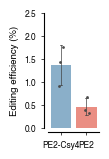

In [19]:
## Use the sequence in pegRNA not in gDNA so need to reverse complement
path = '../Figure1/ENGRAM_1_vs_2/'
samples =sorted([s.split('_S')[0] for s in os.listdir(path) if '.gz' in s and 'R2' in s])

edits = []
for s in samples:
    file = path+s
    #rcount = int(read_count[read_count['sample'].str.contains(s)]['counts'])
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = np.array([a for a in [str2array(s) for s in temp]if len(a[0])==5 or a[0]==''],dtype=object)
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    
    b = a.rstrip('-3-ENGRAM').lstrip('HEK293T-')
    edits.append([b,'rep'+rep,ratio*100])
df = pd.DataFrame(edits,columns=['Designs','rep','Editing efficiency'])

fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency',order=['PE2-Csy4','PE2'],palette=['#80B1D3','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1) 
sns.stripplot(data=df, x="Designs", y='Editing efficiency',order=['PE2-Csy4','PE2'],dodge=True,color="#4A4A4A",marker='.',size=4,ax=axs)
axs.set_xlabel('');
axs.set_ylim(0,2.5);
g.set_box_aspect(4.5/len(g.patches))
start, end = axs.get_ylim()
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
#plt.savefig('../Figure1/fig/SupFig1f.pdf')

# ENGRAM 2.0 demo

## ENGRAM 2.0 Time series Figure 1c 

In [5]:
path = '../Figure1/time_seires/'
samples =sorted([s.split('.')[0] for s in os.listdir(path) if '.tsv' in s])
edits = []
for i in range(len(samples)):
    with open(path+samples[i]+'.tsv','r') as f:
        edit = float(f.readlines()[0].rstrip('\n').split('\t')[-1])
        a,b = samples[i].split('-D')
        day,rep = b.split('_')[0:2]
        edits.append([a,int(day),rep,100-edit])
df1 = pd.DataFrame(edits,columns=['Design','days','rep','Editing efficiency'])

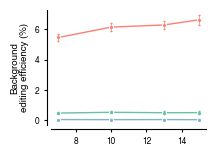

In [6]:
df1['days'] = pd.Categorical(df1['days'],
                             categories=[4,7,10,13,15,20],ordered=True) #['D1','D3','D5','D7','D9','D11','D13','D15','D17','D21']
fig, axs = plt.subplots(1,figsize=(2,1.5),sharey=False,sharex=False)
g=sns.lineplot(data=df1,x="days", y="Editing efficiency",hue='Design',style='Design',palette=['#FB8072','#80B1D3','#66C2A5'],\
               linewidth = 1,markers=['.','.','.'],dashes=False,err_style="bars", err_kws={'capsize':1,'elinewidth':0.5},errorbar='sd',ax=axs)
axs.set_xlabel('');
axs.set_ylabel('Background\nediting efficiency (%)',fontsize=7)
axs.yaxis.set_ticks(np.arange(0, 7, 2))
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
g.legend_.remove()
sns.despine(offset=3)

#plt.savefig('../Figure1/fig/Fig_1c.pdf')

## ENGRAM 2.0 variants comparison Figure 1d

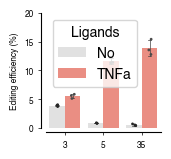

In [20]:
path = '../Figure1/ENGRAM_variants_comparison/'
samples =sorted([s.split('_S')[0] for s in os.listdir(path) if '.gz' in s and 'R1' in s ])

edits = []
for s in samples:
    file = path+s
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = merge_edit_1([a for a in [str2array(s) for s in temp] if len(a[0])==5 or a[0]==''])
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    
    b = a.split('-')
    if len(b)==4:
        edits.append([b[-2],b[-1],'rep'+rep,ratio*100])
    else:
        edits.append(['No',b[-1],'rep'+rep,ratio*100])
df = pd.DataFrame(edits,columns=['Ligands','Designs','rep','Editing efficiency'])

fig, axs = plt.subplots(figsize=(2,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency', hue="Ligands", order=['3','5','35'],palette=['#E1E1E1','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1) 
sns.stripplot(data=df, x="Designs", y='Editing efficiency', hue="Ligands",order=['3','5','35'], dodge=True,palette='dark:#4A4A4A' ,marker='.',size=4,ax=axs,legend=False)

axs.set_xlabel('');
axs.set_ylim(0,20);
start, end = axs.get_ylim()
axs.set_ylabel('Editing efficiency (%)',fontsize=6)
g.set_box_aspect(6/len(g.patches))
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)

#plt.savefig('../Figure1/fig/Figure1d.pdf')

## ENGRAM 2.0 pegRNA vs epegRNA  Supp Fig 1g

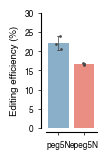

In [29]:
## Use the sequence in pegRNA not in gDNA so need to reverse complement
path = '../Figure1/epeg/'
samples =sorted([s.split('_S')[0] for s in os.listdir(path) if '.gz' in s and 'R1' in s])

edits = []
for s in samples:
    file = path+s
    #rcount = int(read_count[read_count['sample'].str.contains(s)]['counts'])
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = np.array([a for a in [str2array(s) for s in temp]if len(a[0])==5 or a[0]==''],dtype=object)
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    b = a.split('-')
    edits.append([b[-1],'rep'+rep,ratio*100])

df = pd.DataFrame(edits,columns=['Designs','rep','Editing efficiency'])
fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency', order=['peg5N','epeg5N'],palette=['#80B1D3','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1)
sns.stripplot(data=df, x="Designs", y='Editing efficiency',  order=['peg5N','epeg5N'],dodge=True,color="#4A4A4A",marker='.',size=4,ax=axs)

axs.set_xlabel('');
g.set_box_aspect(4.5/len(g.patches))
axs.set_ylim(0,30)
start, end = axs.get_ylim()
axs.yaxis.set_ticks(np.arange(start, end+1, 5))
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
#plt.savefig('../Figure1/fig/SupFig1g_epeg.pdf');

## ENGRAM 2.0 PEmax vs PE2 Supp Fig 1h

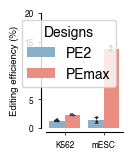

In [123]:
path = '../Figure1/PEmax/'
samples =sorted([s.split('_bc_count')[0] for s in os.listdir(path) if '.tsv' in s ])
edits = []
for s in samples:
    file = path+s
    #rcount = int(read_count[read_count['sample'].str.contains(s)]['counts'])
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = np.array([a for a in [str2array(s) for s in temp] if len(a[0])==5 or a[0]==''],dtype=object)
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    b = a.split('-')
    edits.append([b[0],b[1],'rep'+rep,ratio*100])
df = pd.DataFrame(edits,columns=['cell','Designs','rep','Editing efficiency'])
fig, axs = plt.subplots(figsize=(1,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="cell", y='Editing efficiency', hue='Designs',palette=['#80B1D3','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1)
sns.stripplot(data=df, x="cell", y='Editing efficiency', hue='Designs', dodge=True,palette='dark:#4A4A4A',marker='.',size=4,ax=axs,legend=False)

axs.set_xlabel('');
start, end = axs.get_ylim()
axs.set_ylim(0,20)
start, end = axs.get_ylim()
axs.yaxis.set_ticks(np.arange(start, end+0.2, 5))
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
plt.savefig('../Figure1/fig/SupFig1h_PEmax_mESC.pdf')

In [ ]:
print (f"p-value: {sp.stats.ttest_ind(df[df['Designs']=='PEmax']['Editing efficiency'], df[df['Designs']=='PE2']['Editing efficiency'],equal_var=True)[1]}")
print (f"Fold change: {df[df['Designs']=='PEmax']['Editing efficiency'].mean()/df[df['Designs']=='PE2']['Editing efficiency'].mean()}")

## ENGRAM 2.0 with tRNA Suppp Figure 1i

In [155]:
samples =sorted([s for s in os.listdir(path) if '.fastq.gz' in s and 'tRNA' not in s ])


In [156]:
sorted(samples)

['293T-NFKB-ENGRAM-TNFa_rep1_S6_R1_001.fastq.gz',
 '293T-NFKB-ENGRAM-TNFa_rep2_S14_R1_001.fastq.gz',
 '293T-NFKB-ENGRAM-TNFa_rep3_S22_R1_001.fastq.gz',
 '293T-NFKB-ENGRAM-neg_rep1_S5_R1_001.fastq.gz',
 '293T-NFKB-ENGRAM-neg_rep2_S13_R1_001.fastq.gz',
 '293T-NFKB-ENGRAM-neg_rep3_S21_R1_001.fastq.gz']

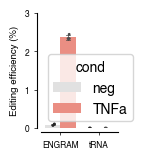

In [165]:
path = '../Figure1/tRNA/'
samples =sorted([s.split('_bc_count')[0] for s in os.listdir(path) if '.tsv' in s ])
edits = []
for s in samples:
    file = path+s
    #rcount = int(read_count[read_count['sample'].str.contains(s)]['counts'])
    with open(file +'_bc_count.tsv','r') as f:
        temp = f.readlines()
        count_table = np.array([a for a in [str2array(s) for s in temp] if len(a[0])==5 or a[0]==''],dtype=object)
        ratio = sum(count_table[1:,1])/sum(count_table[:,1])
    f.close()
    a,rep = s.split('_rep')
    b = a.split('-')
    edits.append([b[2],b[3],'rep'+rep,ratio*100])
df = pd.DataFrame(edits,columns=['Designs','cond','rep','Editing efficiency'])
fig, axs = plt.subplots(figsize=(1,1.5),sharey=False,sharex=False)
g=sns.barplot(data=df, x="Designs", y='Editing efficiency', hue='cond', hue_order =['neg','TNFa'],palette=['#E1E1E1','#FB8072'],errwidth=0.5, errorbar='sd', capsize=.1)
sns.stripplot(data=df, x="Designs", y='Editing efficiency', hue='cond', hue_order =['neg','TNFa'], dodge=True,palette='dark:#4A4A4A',marker='.',size=4,ax=axs,legend=False)

axs.set_xlabel('');
start, end = axs.get_ylim()
axs.set_ylim(0,3)
start, end = axs.get_ylim()
axs.yaxis.set_ticks(np.arange(start, end+0.2, 1))
axs.set_ylabel('Editing efficiency (%)',fontsize=7)
axs.xaxis.set_tick_params(width=0.5, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.5, length=2,labelsize=6)
sns.despine(offset=3)
#plt.savefig('../Figure1/fig/SupFig1h_PEmax_mESC.pdf')

## ENGRAM 2.0 PGK 5N Figure 1 f g 

In [170]:
## Use the sequence in pegRNA not in gDNA so need to reverse complement
path = '../Figure1/epeg/'
with open(path+'293T-peg5N_rep1_bc_count.tsv','r') as f:
    temp = f.readlines()[1:]
    rep1 = pd.DataFrame([a for a in [str2array(s) for s in temp] if len(a[0])==5],columns=['barcode','count'])

with open(path+'293T-peg5N_rep2_bc_count.tsv','r') as f:
    temp = f.readlines()[1:]
    rep2 = pd.DataFrame([a for a in [str2array(s) for s in temp] if len(a[0])==5],columns=['barcode','count'])

with open(path+'293T-peg5N_rep3_bc_count.tsv','r') as f:
    temp = f.readlines()[1:]
    rep3 = pd.DataFrame([a for a in [str2array(s) for s in temp] if len(a[0])==5],columns=['barcode','count'])    

df = rep1.merge(rep2,on='barcode',how='outer').merge(rep3,on='barcode',how='outer').fillna(0).sort_values(by='barcode').reset_index(drop=True)
df.columns = ['barcode','ins_rep1','ins_rep2','ins_rep3']
df['ratio_rep1'] =  np.log2((df['ins_rep1']+1)/(df['ins_rep1'].sum()+1))
df['ratio_rep2'] =  np.log2((df['ins_rep2']+1)/(df['ins_rep2'].sum()+1))
df['ratio_rep3'] =  np.log2((df['ins_rep3']+1)/(df['ins_rep3'].sum()+1))
df['ratio'] = np.log2((df['ins_rep1']+df['ins_rep2']+df['ins_rep3'])/
                          (df['ins_rep1'].sum()+df['ins_rep2'].sum()+df['ins_rep3'].sum()))

## Open plasmid and merge
with open(path+'/plasmid/peg5N-plasmid_bc_count.tsv','r') as f:
    temp = f.readlines()[1:]
    plasmid = pd.DataFrame([a for a in [str2array(s) for s in temp] if len(a[0])==5 and a[1]>=100],columns=['bc_rc','count'])    
plasmid['barcode'] = plasmid['bc_rc'].apply(reverse_complement)

plasmid['ratio_plasmid'] =  np.log2((plasmid['count']+1)/(plasmid['count'].sum()+1))
df = df.merge(plasmid,on='barcode',how='right')
df['ES'] = df['ratio'] - df['ratio_plasmid']

In [171]:
df.loc[:,('barcode','ES')].to_csv('../Figure1/5N_ES.txt',sep='\t',index=False)

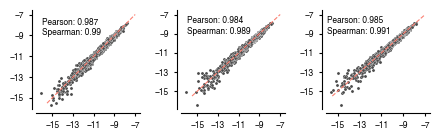

In [172]:
fig, axs = plt.subplots(1,3,figsize=(4.5,1.5),sharey=False,sharex=False)
sample = [('ratio_rep1','ratio_rep2'),('ratio_rep1','ratio_rep3'),('ratio_rep2','ratio_rep3')]
k=0
for i in range(3):
    s=sample[k]
    sns.scatterplot(x=s[0],y=s[1],data = df, color=['#4A4A4A'],s=5,ax=axs[i],marker='o')
    pr = sp.stats.pearsonr(df[s[0]],df[s[1]])[0]
    sr = sp.stats.spearmanr(df[s[0]],df[s[1]])[0]
    axs[i].plot([-15.5,-7],[-15.5,-7], '--',color='#FB8072',linewidth=0.8)
    sns.despine(offset=3)
    start, end = -15,-5
    axs[i].yaxis.set_ticks(np.arange(start, end, 2))
    axs[i].xaxis.set_ticks(np.arange(start, end, 2))
    axs[i].text(-16,-9,"Pearson: "  + str(round(pr,3))  + "\nSpearman: "+str(round(sr,3)),fontsize=6)
    axs[i].set_xlabel('')#s[0])
    axs[i].set_ylabel('')#s[1])
    axs[i].xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
    axs[i].yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
    k+=1
plt.tight_layout()
#plt.savefig('../Figure1/fig/Figure1_pgk_5N.pdf')

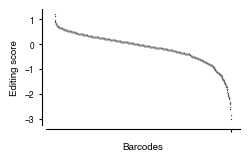

In [173]:
fig, axs = plt.subplots(figsize=(2.5,1.5),sharey=False,sharex=False)
sns.scatterplot(data = df.sort_values(by='ES',ascending=False), x='barcode',y='ES',color=['#4A4A4A'], s=1,ax=axs)
sns.despine(offset=3)
axs.set_xlabel('Barcodes',fontsize=7);
axs.set_xticks([''])
axs.set_ylabel('Editing score',fontsize=7)
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
for tick in axs.get_xticklabels():
    tick.set_rotation(-90)
#plt.savefig('../Figure1/fig/Fig_1_5N_ES.pdf')

## pegRNA MFE and prediction Figure 1h Supp Figure2 f g

In [167]:
## no need to run, 
import nupack as nup # this needs newer cpu nodes

model1 = nup.Model(material='rna', celsius=37,sodium=0.5, magnesium=0.0)

peg = 'gcGGCCCAGACUGAGCACGUGAGUUUUAGAGCUAGAAAUAGCAAGUUAAAAUAAGGCUAGUCCGUUAUCAACUUGAAAAAGUGGGACCGAGUCGGUCCUCUGCCAUCANNNNNCGUGCUCAGUCUGACUGCCGUAUAggca'
nts = ['A','U','C','G']
bcs = [a+b+c+d+e for a in nts for b in nts for c in nts for d in nts for e in nts]
table = []
for bc in bcs:
    new_peg = nup.Strand(peg.replace('NNNNN',bc),name='new_peg')
    set1 = nup.ComplexSet(strands=[new_peg])
    result = nup.complex_analysis(complexes=set1, model=model1, compute=['pairs', 'mfe'])
    table.append([bc,result['(new_peg)'].mfe[0].energy]) 
pd.DataFrame(table,columns=['barcode','MFE']).to_csv('../Figure1/pegRNA_FreeG_5N.csv',index=False,sep='\t')

In [174]:
# Run the PGK5N before this

In [175]:
MFE = pd.read_table('../Figure1/pegRNA_FreeG_5N.csv')
MFE['barcode']=MFE['barcode'].apply(reverse_complement)
df_mfe = pd.merge(df[['barcode','ES']],MFE,on='barcode')

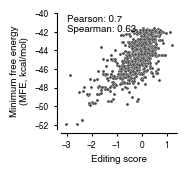

In [176]:
fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
sns.scatterplot(x='ES',y='MFE', data=df_mfe, color=['#4A4A4A'],s=5,ax=axs)
sns.despine(offset=3)
axs.set_xlabel('Editing score',fontsize=7);
axs.set_ylabel('Minimum free energy\n(MFE, kcal/mol)',fontsize=7);
pr = sp.stats.pearsonr(df_mfe['ES'],df_mfe['MFE'])[0]      
sr = sp.stats.spearmanr(df_mfe['ES'],df_mfe['MFE'])[0]   
axs.text(-3,-42,"Pearson: "  + str(round(pr,2))  + "\nSpearman: "+str(round(sr,2)),fontsize=7);
axs.xaxis.set_ticks(np.arange(-3, 2, 1));
axs.yaxis.set_ticks(np.arange(-52, -39, 2));
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6)
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure1/fig/Supp_Fig_1_MFE_only.pdf')

In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge,RidgeCV, ElasticNet, SGDRegressor, ElasticNetCV, LassoCV
from sklearn.preprocessing import MinMaxScaler
#convert to single and di-nucleotide hotencode
def onehotencoder(seq):
    nt= ['A','T','C','G']
    head = []
    l = len(seq)
    for k in range(l):
        for i in range(4):
            head.append(nt[i]+str(k))

    for k in range(l-1):
        for i in range(4):
            for j in range(4):
                head.append(nt[i]+nt[j]+str(k))
    head_idx = {}
    for idx,key in enumerate(head):
        head_idx[key] = idx
    encode = np.zeros(len(head_idx))
    for j in range(l):
        encode[head_idx[seq[j]+str(j)]] =1.
    for k in range(l-1):
        encode[head_idx[seq[k:k+2]+str(k)]] =1.
    return encode

In [54]:
scaler = MinMaxScaler()
scaler.fit(df_mfe['MFE'].values.reshape(-1, 1))
df_mfe['MFE_norm'] = scaler.transform(df_mfe['MFE'].values.reshape(-1, 1))
data=[]
for i in range(len(df_mfe)):
    data.append(list(onehotencoder(df_mfe.loc[i,'barcode']))+[df_mfe.loc[i,'MFE_norm'],df_mfe.loc[i,'ES'],df_mfe.loc[i,'barcode']])
data=np.array(data,dtype=object)


np.random.seed(123)
idx2 = np.arange(data.shape[0])
np.random.shuffle(idx2)
train_size = 680
data =data[idx2]
# split into training and test set
X_train, y_train = data[:train_size,:-2],data[:train_size,-2]
X_test, y_test = data[train_size:,:-2], data[train_size:,-2]

lasso_model = LassoCV(cv = 10, copy_X = True, max_iter=100000)
lasso_fit = lasso_model.fit(X_train, y_train)
lasso_path = lasso_model.path(X_train, y_train)
pred = pd.DataFrame({"Predicted ES":lasso_fit.predict(X_test),"Real ES":y_test})
pr = sp.stats.pearsonr(pred["Predicted ES"],pred["Real ES"])[0]      
sr = sp.stats.spearmanr(pred["Predicted ES"],pred["Real ES"])[0] 
print (pr)

0.9066077258292391


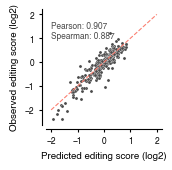

In [55]:
fig, axs = plt.subplots(figsize=(1.5,1.5),sharey=False,sharex=False)
sns.scatterplot(data = pred, x='Predicted ES',y='Real ES',color=['#4A4A4A'], s=5,ax=axs)
sns.despine(offset=3)
axs.set_xlabel('Predicted editing score (log2)',fontsize=7);
axs.set_ylabel('Observed editing score (log2)',fontsize=7)
start, end = -2,2.5

axs.plot([-2,2],[-2,2], '--',color='#FB8072',linewidth=0.8)
axs.text(-2,1,"Pearson: "  + str(round(pr,3))  + "\nSpearman: "+str(round(sr,3)),fontsize=6,color='#4A4A4A')
axs.xaxis.set_tick_params(width=0.8, length=2,labelsize=6);
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6);
axs.yaxis.set_ticks(np.arange(start, end, 1));
axs.xaxis.set_ticks(np.arange(start, end, 1));
#plt.savefig('../Figure1/fig/Fig_1_5N_pred.pdf')

In [56]:
l=5
nt= ['A','T','C','G']
head = []
for k in range(l):
    for i in range(4):
        head.append(nt[i]+str(k))

for k in range(l-1):
    for i in range(4):
        for j in range(4):
             head.append(nt[i]+nt[j]+str(k))
head+=['MFE']
coef = pd.DataFrame({'label':head,'coef':lasso_fit.coef_})

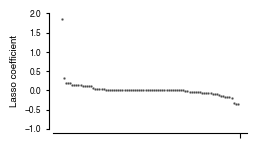

In [57]:
fig, axs = plt.subplots(figsize=(2.5,1.5),sharey=False,sharex=False)
sns.scatterplot(data = coef.sort_values(by='coef',ascending=False), x='label',y='coef',color='#4A4A4A',s=3,ax=axs)
sns.despine(offset=3)
axs.set_xlabel('Label',fontsize=7);
axs.set_ylabel('Lasso coefficient',fontsize=7)
axs.set_ylim(-1,2)
axs.set_xlabel('')
axs.set_xticks('')
axs.yaxis.set_tick_params(width=0.8, length=2,labelsize=6)
#plt.savefig('../Figure1/fig/Fig_1_5N_coef.pdf')

In [58]:
coef.sort_values(by='coef',ascending=False)

,label,coef
84,MFE,1.860110
30,CC0,0.327533
66,GC2,0.200801
34,GC0,0.194097
44,CA1,0.182391
...,...,...
51,GG1,-0.177487
55,AG2,-0.192840
27,TG0,-0.320011
39,AG1,-0.350304


# Does ENGRAM affect cell functions? RNA seq DEseq

In [59]:
# Python cell don't run, raw counts provided
path = '../Figure1/RNAseq/'
samples = sorted([s.split('_S')[0] for s in os.listdir(path) if '.fastq.gz' in s])
df = pd.read_table(path+samples[0]+'_ReadsPerGene.out.tab',skiprows=4,header=None,usecols=range(2))
df.columns =  ['ID',samples[0]]
for i in range(1,len(samples)):
    temp = pd.read_table(path+samples[i]+'_ReadsPerGene.out.tab',skiprows=4,header=None,usecols=range(2))
    temp.columns =  ['ID',samples[i]]
    df = pd.merge(df,temp, on=['ID'], how='outer')
    
    # remove low count genes
df[df.sum(axis=1,numeric_only=True)>2000].reset_index(drop=True).to_csv('../Figure1/RNAseq/RNAseq_Count_All_samples.tsv',sep='\t',index=False)
conditions = [s.replace('-RNA','').split('-rep')[0].replace('293T-','') for s in samples]
coldata = pd.DataFrame((samples,[s.replace('-RNA','').split('-rep')[0].replace('293T-','').replace('-','.') for s in samples])).T 
coldata.to_csv('../Figure1/RNAseq/RNA_seq_coldata.tsv',sep='\t',index=False)

In [81]:
# Run this part of code in R. 

In [ ]:
suppressPackageStartupMessages({
  options(stringsAsFactors = FALSE)
  library(DESeq2);
  library(data.table);
  library(gdata);
  library(BSgenome);
  library(ggplot2);
  library(RColorBrewer);
  library(biomaRt);
  library(ggrepel);
  library(tidyverse);
    library(glue)})

In [ ]:
cts <- as.matrix(read.csv("../Figure1/RNAseq/RNAseq_Count_All_samples.tsv", sep = "\t", header = T,row.names="ID"))
colnames(cts) <- sub("X", "", colnames(cts))
row.names(cts) <- nth(tstrsplit(row.names(cts), split ="\\."),n=1)

coldata <- read.csv("../Figure1/RNAseq/RNA_seq_coldata.tsv", sep = "\t", row.names='X0')
rownames(coldata) <- gsub("-", ".", rownames(coldata))
colnames(coldata) <- c('condition')

dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design = ~ condition)
dds <- DESeq(dds)

## PCA plot

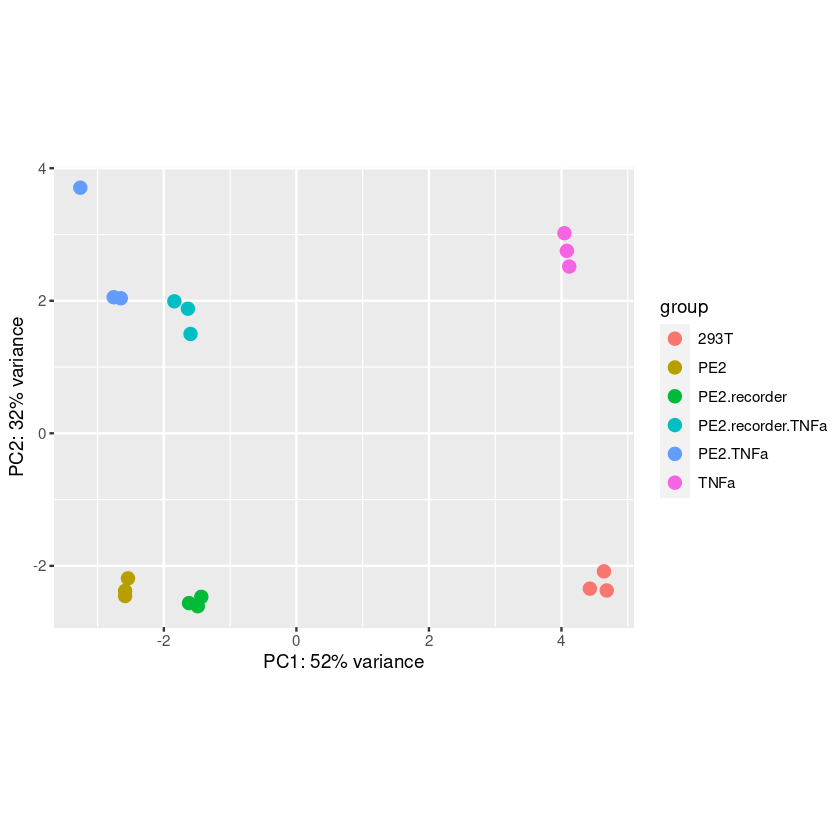

In [ ]:
vsd <- vst(dds, blind=FALSE)
plotPCA(vsd)

## Volcano plot

In [ ]:
dds$condition = relevel(dds$condition,'PE2.recorder.TNFa') # only compares the activation of recorder to remove the other effects
dds = DESeq(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [ ]:
comp = 'PE2.TNFa'
res_unshrunken <- results(dds, contrast=c("condition",comp,"PE2.recorder.TNFa"), alpha = 0.05, lfcThreshold = 0.58)
res <- lfcShrink(dds, coef=glue('condition_{comp}_vs_PE2.recorder.TNFa'), res=res_unshrunken)
res$rowname <- rownames(res)

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



In [ ]:
symb <- read_csv("../Figure1/RNAseq/ensemble_gname.csv",show_col_types = FALSE)

In [ ]:
res_final <- res %>%
  data.frame() %>% 
  merge(.,symb,by.x = 0,by.y = 'ensembl_gene_id') %>% 
  as_tibble()%>% arrange(log2FoldChange)%>% 
                  mutate(threshold = padj < 0.05)
#res_final <- res_final %>% mutate(genelabels = "")
#res_final$genelabels[1:10] <- as.character(res_final$external_gene_name[1:10])

In [ ]:
res_sub <- rbind(head(res_final,50),tail(res_final,50),subset(res_final,abs(res_final$log2FoldChange)<0.25)%>% sample_n(2000)) # subsampling for plot reasons

In [ ]:
pdf(file = "../Figure1/fig/SuppFig1_deseq.pdf",   # The directory you want to save the file in
    width = 1.5, # The width of the plot in inches
    height = 1.5) # The height of the plot in inches
p1 <- ggplot(res_sub, aes(x = log2FoldChange, y = -log10(padj))) +
        geom_point(aes(colour = threshold),size=1 ) + 
        scale_color_manual(values=c("#5C5C5C", "#FB8072"))+
        xlab("") + 
        ylab("") + 
        scale_x_continuous(limits = c(-1,1))+
        scale_y_continuous(limits = c(0., 1))+ 
        theme_classic() + 
        theme(legend.position="none",
              axis.text = element_text(size = 6),
              axis.title = element_text(size = 7),
              axis.ticks.length=unit(2,"pt"),
              axis.ticks = element_line(size=72.27/96*0.5),
              axis.line = element_line(color="black", size = 72.27/96*0.5))
p1
dev.off()